## Data Loading

https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [ ]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Features and Target split

In [ ]:
x = df.iloc[:,3:13]
y = df.iloc[:,13]

## One Hot encoding for categorical coloumns

In [ ]:
geo = pd.get_dummies(x['Geography'],drop_first=True).astype(int)
gen = pd.get_dummies(x['Gender'],drop_first=True).astype(int)
x = x.drop(['Geography','Gender'],axis=1)
x = pd.concat([x,geo,gen],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


## train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


## scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


## Model Building

### **1. Sequential Model**

* `Sequential` means layers are stacked one after another in a forward pipeline.
* Good for simple feed-forward networks like MLPs.

### **2. First Hidden Layer**

* **16 neurons**
* **ReLU activation** for non-linearity
* `input_shape` specifies the number of input features
* This layer learns higher-level representations from the input data.

### **3. Second Hidden Layer**

* **6 neurons**
* ReLU activation again
* Helps the model learn deeper patterns

### **4. Output Layer**

* **1 neuron** because it's a binary classification problem
* **Sigmoid activation** outputs a probability between 0 and 1

---


In [ ]:
x_train.shape[1]

11

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)), #input layer + first hidden layer(16)
    Dense(6, activation='relu'), #2nd Hidden layer (6)
    Dense(1, activation='sigmoid') # output layer
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Dense = Fully Connected Layer.

- Every neuron in the layer connects to every neuron in the previous layer.

### Drop Out Layer

* Dropout is a regularization technique used to reduce **overfitting**.
* During training, it randomly “drops” (turns off) a percentage of neurons in a layer.
* A value like **0.3** means 30% of the neurons in that layer are ignored in each training step.



In [ ]:
from tensorflow.keras.layers import Dropout


model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),                 # 30% dropout

    Dense(8, activation='relu'),
    Dropout(0.2),                 # 20% dropout

    Dense(1, activation='sigmoid')
])

## Compile Model

- compile() tells the model how to learn, what error to minimize, and what performance metric to report.

In [ ]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Early Stopping

* **EarlyStopping** is a callback used to stop training when the model stops improving.
* **monitor='val_loss'**

  * Watches the validation loss to check if the model is still getting better.
* **patience=3**

  * If validation loss doesn’t improve for 3 consecutive epochs, training is stopped.
* **restore_best_weights=True**

  * After stopping, the model automatically returns to the weights from the epoch where performance was best.
* **Purpose:**

  * Prevents overfitting
  * Saves time by stopping unnecessary training
  * Keeps the model at its best validation performance




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',      # what to watch
    patience=3,              # stop if no improvement for 3 epochs
    restore_best_weights=True
)

## Train the Model

In [ ]:
# ---- Train Model ----
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1, #callbacks=[early_stop]
)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5331 - loss: 0.7084 - val_accuracy: 0.8106 - val_loss: 0.5015
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7902 - loss: 0.5152 - val_accuracy: 0.8106 - val_loss: 0.4412
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7972 - loss: 0.4828 - val_accuracy: 0.8163 - val_loss: 0.4224
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7993 - loss: 0.4617 - val_accuracy: 0.8169 - val_loss: 0.4160
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4651 - val_accuracy: 0.8163 - val_loss: 0.4131
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 0.4492 - val_accuracy: 0.8175 - val_loss: 0.4122
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8018 - loss: 0.4442 - val_accuracy: 0.8163 - val_loss: 0.4103
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8017 - loss: 0.4395 - val_accu

In [ ]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

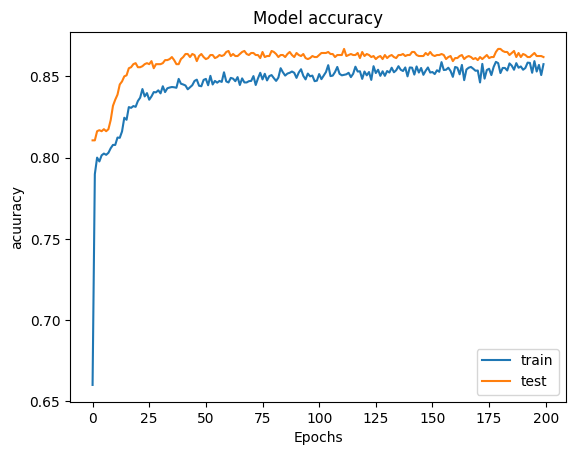

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('acuuracy')
plt.title('Model accuracy')
plt.legend(['train','test'])
plt.show()



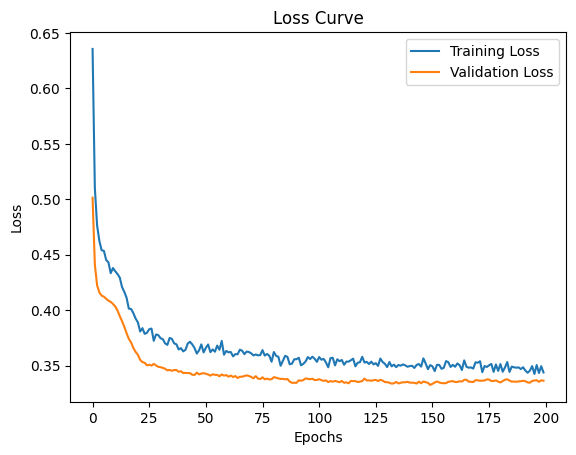

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()



## Prediction and Evaluation

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred>=0.5)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)

print(accuracy)

[[1529   49]
 [ 235  187]]
0.858


In [ ]:
model.get_weights()

[array([[-1.04136139e-01, -1.01717323e-01,  2.42676726e-03,
         -5.57947680e-02,  5.01189649e-01,  1.03602894e-01,
         -8.00827816e-02, -2.60313787e-02, -1.84389472e-01,
          4.63091433e-02,  4.87209409e-02,  2.74653435e-02,
         -5.53837139e-03,  2.63429675e-02, -2.15095039e-02,
         -7.46081546e-02],
        [ 2.91244864e-01, -7.52216458e-01, -1.09198225e+00,
          3.79194081e-01, -4.40035462e-01, -7.99079776e-01,
          7.00669765e-01, -3.15869629e-01,  4.30708557e-01,
          1.51505336e-01, -9.49619651e-01,  3.58204573e-01,
          4.22906876e-01,  3.31286788e-02,  2.16189757e-01,
          5.89313567e-01],
        [-6.16081816e-04,  3.62194069e-02,  2.18436141e-02,
          1.13505404e-02, -2.07655102e-01, -3.69070284e-02,
          1.37063831e-01,  5.07163964e-02, -1.46204215e-02,
         -1.30394576e-02,  4.58266819e-03, -2.63715461e-02,
         -3.14215384e-02, -3.27896588e-02, -2.70072417e-03,
          4.07769680e-02],
        [ 1.1298513

In [ ]:
# Save the model
model.save("churn_model.h5")



In [ ]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## Predict on NEW user input

In [ ]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# ---- Load saved model & scaler ----
model = load_model("churn_model.h5")
scaler = joblib.load("scaler.pkl")

# ---- Take user inputs ----
def get_user_input():
    print("Enter customer details:")

    CreditScore = float(input("CreditScore: "))
    Age = float(input("Age: "))
    Tenure = float(input("Tenure: "))
    Balance = float(input("Balance: "))
    NumOfProducts = float(input("NumOfProducts: "))
    HasCrCard = int(input("HasCrCard (1=yes, 0=no): "))
    IsActiveMember = int(input("IsActiveMember (1=yes, 0=no): "))
    EstimatedSalary = float(input("EstimatedSalary: "))

    geo = input("Geography (Germany/Spain/France): ").strip().lower()
    gender = input("Gender (Male/Female): ").strip().lower()

    # ---- One-Hot Encoding manually ----
    Germany = 1 if geo == "germany" else 0
    Spain = 1 if geo == "spain" else 0
    # France is implicitly 0 for both (drop_first=True behavior)

    Male = 1 if gender == "male" else 0

    # Put in correct order
    features = np.array([[CreditScore, Age, Tenure, Balance, NumOfProducts,
                          HasCrCard, IsActiveMember, EstimatedSalary,
                          Germany, Spain, Male]])
    return features


# ---- Prepare features & predict ----
user_features = get_user_input()

# Scale using SAME scaler
scaled_features = scaler.transform(user_features)

# Predict
pred_prob = model.predict(scaled_features)[0][0]
pred_class = 1 if pred_prob >= 0.5 else 0

print("\n📌 Churn Probability:", pred_prob)
print("📌 Final Prediction (0=No Churn, 1=Churn):", pred_class)


Enter customer details:
CreditScore: 4543
Age: 32
Tenure: 12
Balance: 34
NumOfProducts: 34
HasCrCard (1=yes, 0=no): 0
IsActiveMember (1=yes, 0=no): 1
EstimatedSalary: 123445
Geography (Germany/Spain/France): Germany
Gender (Male/Female): Male


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step

📌 Churn Probability: 1.0
📌 Final Prediction (0=No Churn, 1=Churn): 1
